In [1]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
df = pd.read_csv('credit_risk.csv')

In [3]:
df.head() #Display first 5 rows of data

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
df.isna().sum() #Check for missing values in the data frame

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [5]:
df=df.copy() #creating a copy of the dataframe
mean_age = df['age'].mean() #Computing the mean age
df['age'] = df['age'].fillna(mean_age) #Filling missing values in age column with mean age
df.isna().sum() #Verifies the missing values have been filled. 

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

# Data visualization

<Axes: xlabel='income', ylabel='age'>

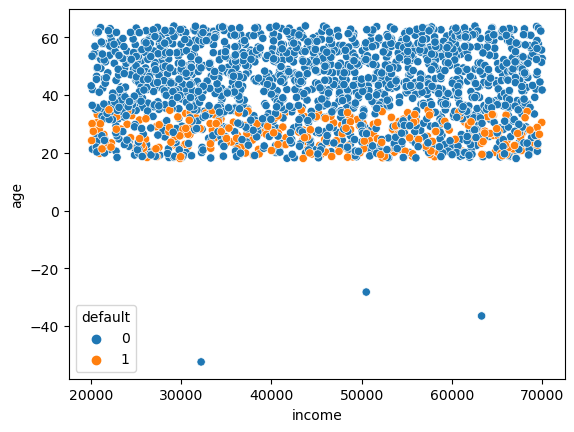

In [6]:
sns.scatterplot(x='income', y='age', hue='default', data=df)

There are outlier ages in the dataframe, we shall remove these specific rows

In [7]:
df.query('age<0')

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [8]:
# drop all rows that have negative age
df = df.drop(df[df['age'] < 0].index)

In [9]:
df.query('age<0')#Checking that the rows have been dropped

,clientid,income,age,loan,default


<Axes: xlabel='income', ylabel='age'>

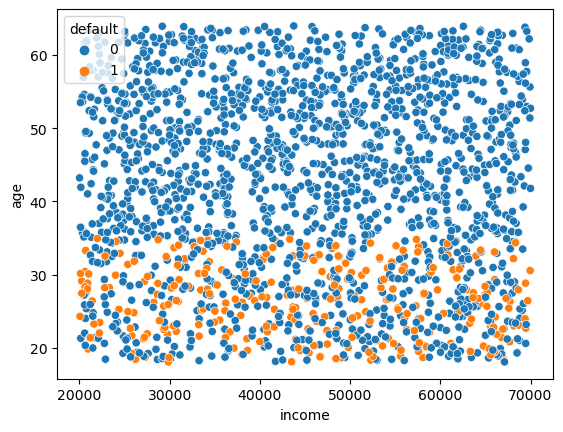

In [10]:
sns.scatterplot(x='income', y='age', hue='default', data=df)

<Axes: xlabel='income', ylabel='loan'>

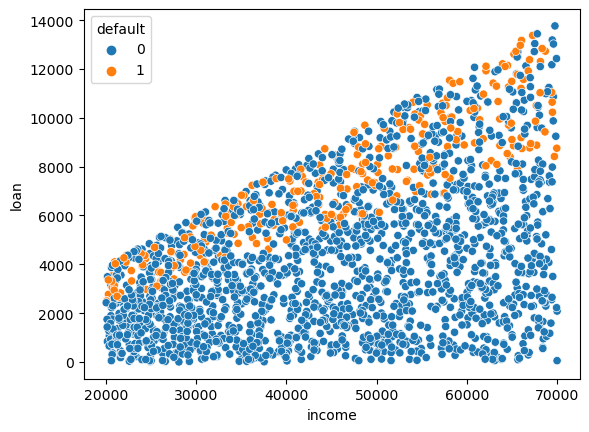

In [11]:
sns.scatterplot(x='income', y='loan', hue='default', data=df)

<Axes: xlabel='loan', ylabel='age'>

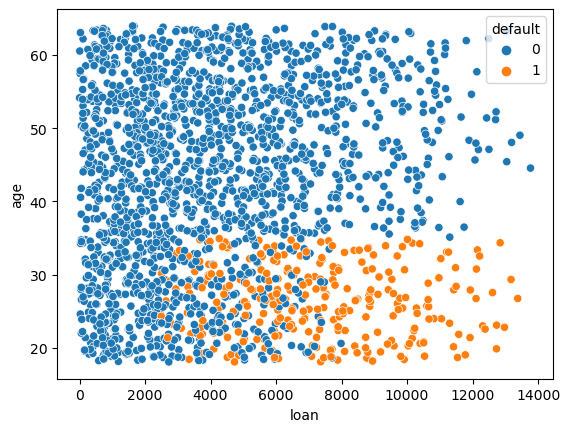

In [12]:
sns.scatterplot(x='loan', y='age', hue='default', data=df)

### Observations
1. Customers of lower ages constitute the largest majority of defaulters
2. Higher loan amounts seem to be correlated with defaulted loans
3. Regardless of amount, customers below the age of 35 are the highest defaulters. 

<Axes: xlabel='default', ylabel='count'>

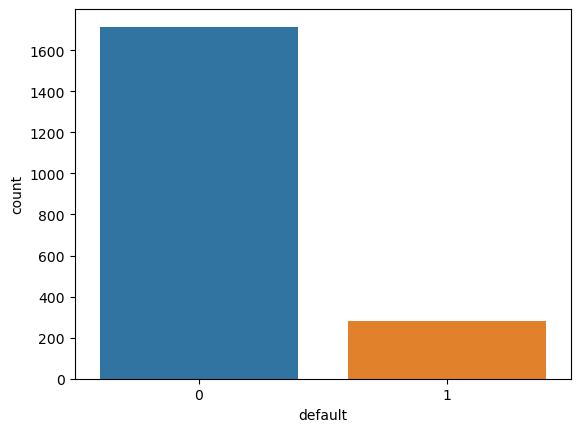

In [13]:
sns.countplot(x='default',  data=df)

In [14]:
#Feature engineering
# Define the age bins and corresponding labels
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']

# Create a new column for age groups
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df

,clientid,income,age,loan,default,AgeGroup
0,1,66155.925095,59.017015,8106.532131,0,51-65
1,2,34415.153966,48.117153,6564.745018,0,36-50
2,3,57317.170063,63.108049,8020.953296,0,51-65
3,4,42709.534201,45.751972,6103.642260,0,36-50
4,5,66952.688845,18.584336,8770.099235,1,19-35
...,...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0,36-50
1996,1997,69516.127573,23.162104,3503.176156,0,19-35
1997,1998,44311.449262,28.017167,5522.786693,1,19-35
1998,1999,43756.056605,63.971796,1622.722598,0,51-65


<Axes: xlabel='AgeGroup', ylabel='count'>

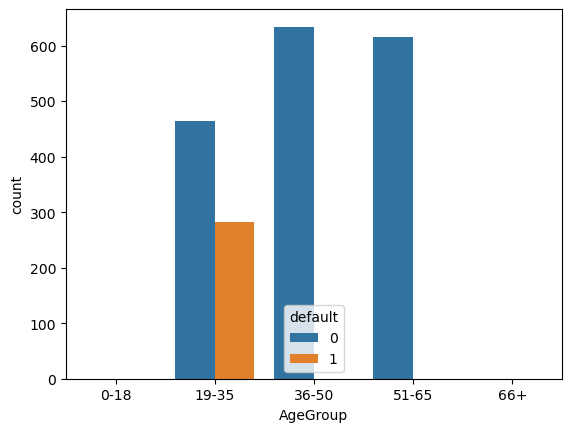

In [15]:
sns.countplot(x='AgeGroup', hue='default', data=df)

In [16]:
print(df['income'].max())
print(df['income'].min())

69995.6855783239
20014.4894700497


In [17]:
#Feature engineering
# Define the age bins and corresponding labels
income_bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000]
income_labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', '50000+']

# Create a new column for age groups
df['Income_Group'] = pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)

df

,clientid,income,age,loan,default,AgeGroup,Income_Group
0,1,66155.925095,59.017015,8106.532131,0,51-65,50000+
1,2,34415.153966,48.117153,6564.745018,0,36-50,20001-30000
2,3,57317.170063,63.108049,8020.953296,0,51-65,40001-50000
3,4,42709.534201,45.751972,6103.642260,0,36-50,30001-40000
4,5,66952.688845,18.584336,8770.099235,1,19-35,50000+
...,...,...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0,36-50,40001-50000
1996,1997,69516.127573,23.162104,3503.176156,0,19-35,50000+
1997,1998,44311.449262,28.017167,5522.786693,1,19-35,30001-40000
1998,1999,43756.056605,63.971796,1622.722598,0,51-65,30001-40000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0-10000'),
  Text(1, 0, '10001-20000'),
  Text(2, 0, '20001-30000'),
  Text(3, 0, '30001-40000'),
  Text(4, 0, '40001-50000'),
  Text(5, 0, '50000+')])

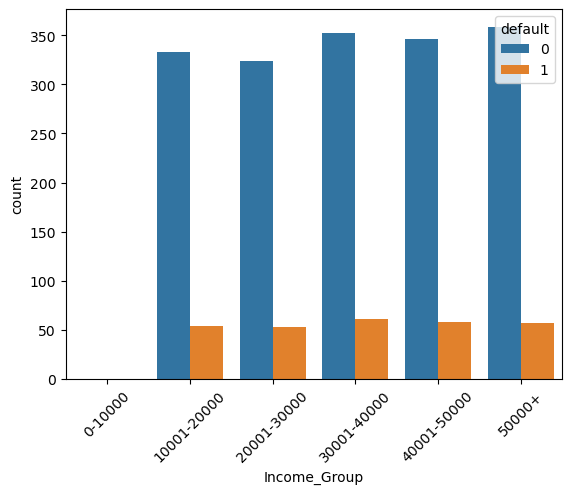

In [18]:
sns.countplot(x='Income_Group', hue='default', data=df)
plt.xticks(rotation=45)

In [19]:
#Feature engineering
# Define the age bins and corresponding labels
loan_bins = [0, 1000, 5000, 10000, 15000]
loan_labels = ['0-1000', '1001-5000', '5001-10000', 'Above 10000']
# Create a new column for age groups
df['Loan_Category'] = pd.cut(df['loan'], bins=loan_bins, labels=loan_labels, right=False)

df

,clientid,income,age,loan,default,AgeGroup,Income_Group,Loan_Category
0,1,66155.925095,59.017015,8106.532131,0,51-65,50000+,5001-10000
1,2,34415.153966,48.117153,6564.745018,0,36-50,20001-30000,5001-10000
2,3,57317.170063,63.108049,8020.953296,0,51-65,40001-50000,5001-10000
3,4,42709.534201,45.751972,6103.642260,0,36-50,30001-40000,5001-10000
4,5,66952.688845,18.584336,8770.099235,1,19-35,50000+,5001-10000
...,...,...,...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0,36-50,40001-50000,1001-5000
1996,1997,69516.127573,23.162104,3503.176156,0,19-35,50000+,1001-5000
1997,1998,44311.449262,28.017167,5522.786693,1,19-35,30001-40000,5001-10000
1998,1999,43756.056605,63.971796,1622.722598,0,51-65,30001-40000,1001-5000


(array([0, 1, 2, 3]),
 [Text(0, 0, '0-1000'),
  Text(1, 0, '1001-5000'),
  Text(2, 0, '5001-10000'),
  Text(3, 0, 'Above 10000')])

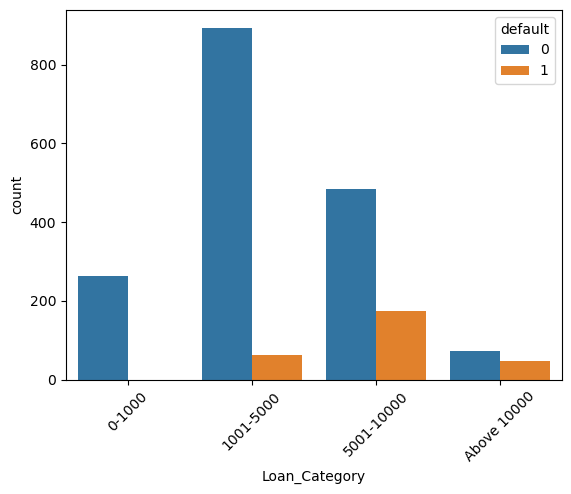

In [20]:
sns.countplot(x='Loan_Category', hue='default', data=df)
plt.xticks(rotation=45)

In [21]:
df.dtypes

clientid            int64
income            float64
age               float64
loan              float64
default             int64
AgeGroup         category
Income_Group     category
Loan_Category    category
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()

# Fit and transform the data
df['AgeGroup'] = label_encoder.fit_transform(df['AgeGroup'])
df['Income_Group'] = label_encoder.fit_transform(df['Income_Group'])
df['Loan_Category'] = label_encoder.fit_transform(df['Loan_Category'])
df

,clientid,income,age,loan,default,AgeGroup,Income_Group,Loan_Category
0,1,66155.925095,59.017015,8106.532131,0,2,4,2
1,2,34415.153966,48.117153,6564.745018,0,1,1,2
2,3,57317.170063,63.108049,8020.953296,0,2,3,2
3,4,42709.534201,45.751972,6103.642260,0,1,2,2
4,5,66952.688845,18.584336,8770.099235,1,0,4,2
...,...,...,...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0,1,3,1
1996,1997,69516.127573,23.162104,3503.176156,0,0,4,1
1997,1998,44311.449262,28.017167,5522.786693,1,0,2,2
1998,1999,43756.056605,63.971796,1622.722598,0,2,2,1


In [24]:
df.dtypes

clientid           int64
income           float64
age              float64
loan             float64
default            int64
AgeGroup           int32
Income_Group       int32
Loan_Category      int32
dtype: object

In [25]:
matrix = df.corr()
print(matrix)

               clientid    income       age      loan   default  AgeGroup  \
clientid       1.000000  0.039980 -0.030488  0.020231 -0.021228 -0.031193   
income         0.039980  1.000000 -0.033226  0.440652  0.002428 -0.029547   
age           -0.030488 -0.033226  1.000000  0.006687 -0.445187  0.941426   
loan           0.020231  0.440652  0.006687  1.000000  0.377779  0.011942   
default       -0.021228  0.002428 -0.445187  0.377779  1.000000 -0.460588   
AgeGroup      -0.031193 -0.029547  0.941426  0.011942 -0.460588  1.000000   
Income_Group   0.033421  0.979681 -0.031952  0.427791 -0.001062 -0.031984   
Loan_Category  0.017542  0.400010 -0.007148  0.917295  0.332305  0.002790   

               Income_Group  Loan_Category  
clientid           0.033421       0.017542  
income             0.979681       0.400010  
age               -0.031952      -0.007148  
loan               0.427791       0.917295  
default           -0.001062       0.332305  
AgeGroup          -0.031984       0.

In [26]:
#Drop columns with low corellation to default
df = df.drop(['clientid'],axis=1)
df = df.drop(['income'], axis=1)
df = df.drop(['Income_Group'], axis=1)
df

,age,loan,default,AgeGroup,Loan_Category
0,59.017015,8106.532131,0,2,2
1,48.117153,6564.745018,0,1,2
2,63.108049,8020.953296,0,2,2
3,45.751972,6103.642260,0,1,2
4,18.584336,8770.099235,1,0,2
...,...,...,...,...,...
1995,48.518179,1926.729397,0,1,1
1996,23.162104,3503.176156,0,0,1
1997,28.017167,5522.786693,1,0,2
1998,63.971796,1622.722598,0,2,1


# Scaling data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
df['age'] = scaler.fit_transform(df[['age']])
df

,age,loan,default,AgeGroup,Loan_Category
0,1.364369,8106.532131,0,2,2
1,0.542266,6564.745018,0,1,2
2,1.672928,8020.953296,0,2,2
3,0.363876,6103.642260,0,1,2
4,-1.685196,8770.099235,1,0,2
...,...,...,...,...,...
1995,0.572512,1926.729397,0,1,1
1996,-1.339926,3503.176156,0,0,1
1997,-0.973741,5522.786693,1,0,2
1998,1.738075,1622.722598,0,2,1


In [30]:
df['loan'] = scaler.fit_transform(df[['loan']])
df

,age,loan,default,AgeGroup,Loan_Category
0,1.364369,1.203524,0,2,2
1,0.542266,0.697145,0,1,2
2,1.672928,1.175417,0,2,2
3,0.363876,0.545703,0,1,2
4,-1.685196,1.421463,1,0,2
...,...,...,...,...,...
1995,0.572512,-0.826147,0,1,1
1996,-1.339926,-0.308385,0,0,1
1997,-0.973741,0.354929,1,0,2
1998,1.738075,-0.925994,0,2,1


In [31]:
matrix = df.corr()
print(matrix)

                    age      loan   default  AgeGroup  Loan_Category
age            1.000000  0.006687 -0.445187  0.941426      -0.007148
loan           0.006687  1.000000  0.377779  0.011942       0.917295
default       -0.445187  0.377779  1.000000 -0.460588       0.332305
AgeGroup       0.941426  0.011942 -0.460588  1.000000       0.002790
Loan_Category -0.007148  0.917295  0.332305  0.002790       1.000000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
X = df.drop('default', axis=1)  # Features
y = df['default']  # Target variable

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model_before_tuning = LogisticRegression(max_iter=1000)  # Initialize model
model_before_tuning.fit(X_train, y_train)  # Train model

LogisticRegression(max_iter=1000)

In [36]:
y_pred = model_before_tuning.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Accuracy: 0.9175
Confusion Matrix:
[[328  11]
 [ 22  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       339
           1       0.78      0.64      0.70        61

    accuracy                           0.92       400
   macro avg       0.86      0.80      0.83       400
weighted avg       0.91      0.92      0.91       400



In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Initialize logistic regression model
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

model_after_tuning = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_after_tuning, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best cross-validation accuracy: {best_score:.4f}')

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.9418


In [40]:
best_params = {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
model_after_tuning = LogisticRegression(**best_params, max_iter=1000, random_state=42)

In [41]:
from sklearn.model_selection import cross_val_score
# Cross-validation scores before tuning
scores_before_tuning = cross_val_score(model_before_tuning, X_train, y_train, cv=5, scoring='accuracy')

# Cross-validation scores after tuning
scores_after_tuning = cross_val_score(model_after_tuning, X_train, y_train, cv=5, scoring='accuracy')

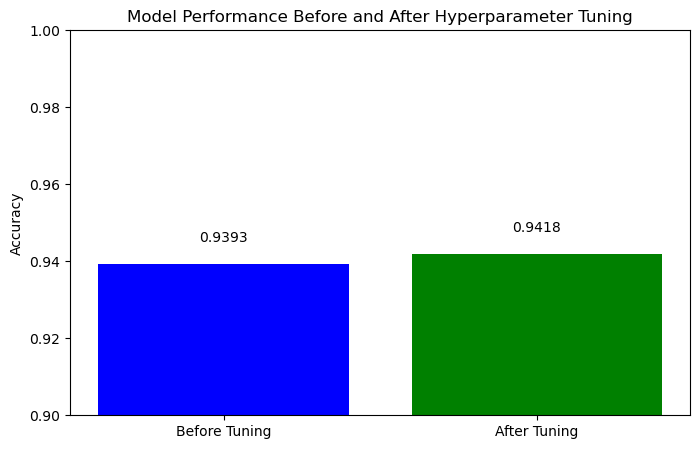

In [42]:
# Plotting the results
labels = ['Before Tuning', 'After Tuning']
scores = [scores_before_tuning.mean(), scores_after_tuning.mean()]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Performance Before and After Hyperparameter Tuning')

# Display the value on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.005, f'{score:.4f}', ha='center', va='bottom', fontsize=10)

plt.ylim(0.9, 1.0)  # Adjust the y-axis limits for better visualization
plt.show()

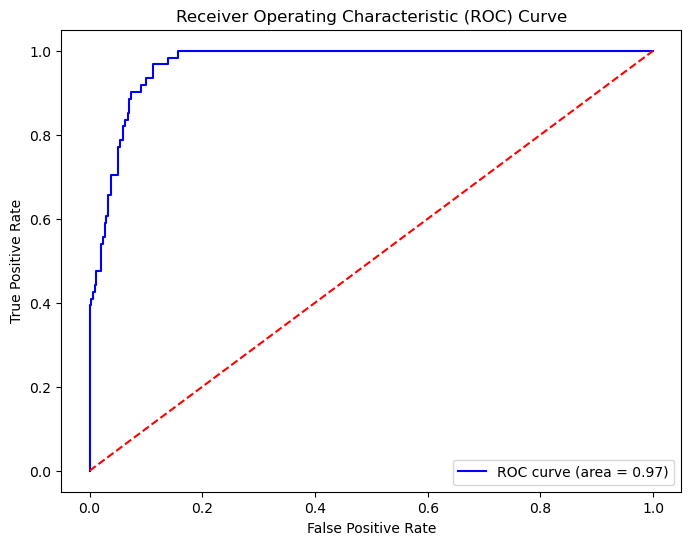

In [43]:
# Example 1: ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model_before_tuning.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

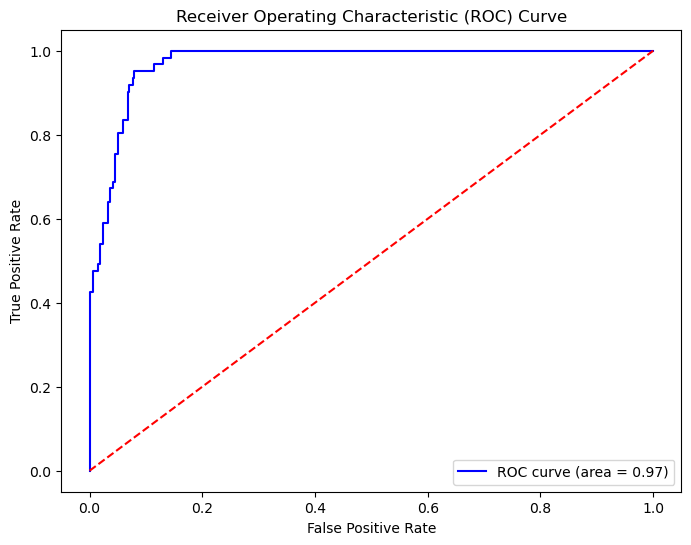

In [44]:
model_after_tuning.fit(X_train, y_train)
y_prob = model_after_tuning.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

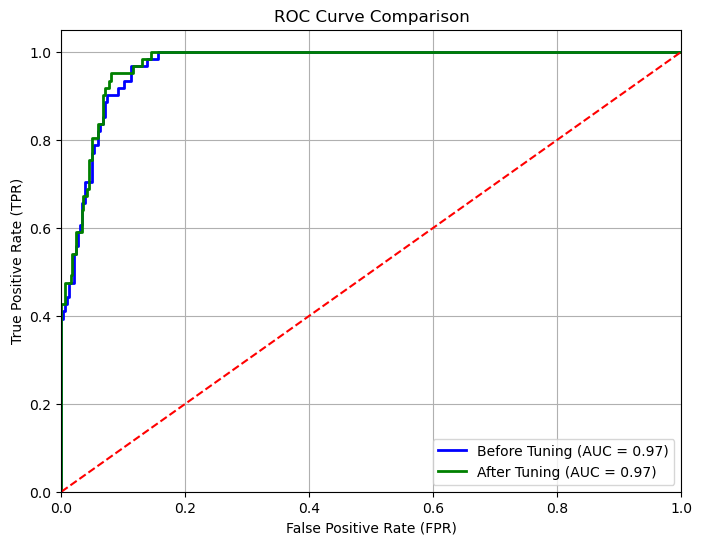

In [45]:
y_prob_before = model_before_tuning.predict_proba(X_test)[:, 1]
y_prob_after = model_after_tuning.predict_proba(X_test)[:, 1]

fpr_before, tpr_before, _ = roc_curve(y_test, y_prob_before)
fpr_after, tpr_after, _ = roc_curve(y_test, y_prob_after)

# Calculate AUC scores for reference
auc_before = roc_auc_score(y_test, y_prob_before)
auc_after = roc_auc_score(y_test, y_prob_after)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_before, tpr_before, color='blue', lw=2, label=f'Before Tuning (AUC = {auc_before:.2f})')
plt.plot(fpr_after, tpr_after, color='green', lw=2, label=f'After Tuning (AUC = {auc_after:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Initialize the model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [47]:
# Predict
y_pred = gb_clf.predict(X_test)
y_proba = gb_clf.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.92
ROC AUC Score: 0.9686155036510469
Confusion Matrix:
 [[329  10]
 [ 22  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       339
           1       0.80      0.64      0.71        61

    accuracy                           0.92       400
   macro avg       0.87      0.80      0.83       400
weighted avg       0.92      0.92      0.92       400



In [48]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [49]:
# Predict with the best model
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print("Best Model Accuracy:", accuracy_best)
print("Best Model ROC AUC Score:", roc_auc_best)
print("Best Model Confusion Matrix:\n", conf_matrix_best)
print("Best Model Classification Report:\n", class_report_best)


Best Model Accuracy: 0.9125
Best Model ROC AUC Score: 0.9723149088447218
Best Model Confusion Matrix:
 [[337   2]
 [ 33  28]]
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       339
           1       0.93      0.46      0.62        61

    accuracy                           0.91       400
   macro avg       0.92      0.73      0.78       400
weighted avg       0.91      0.91      0.90       400



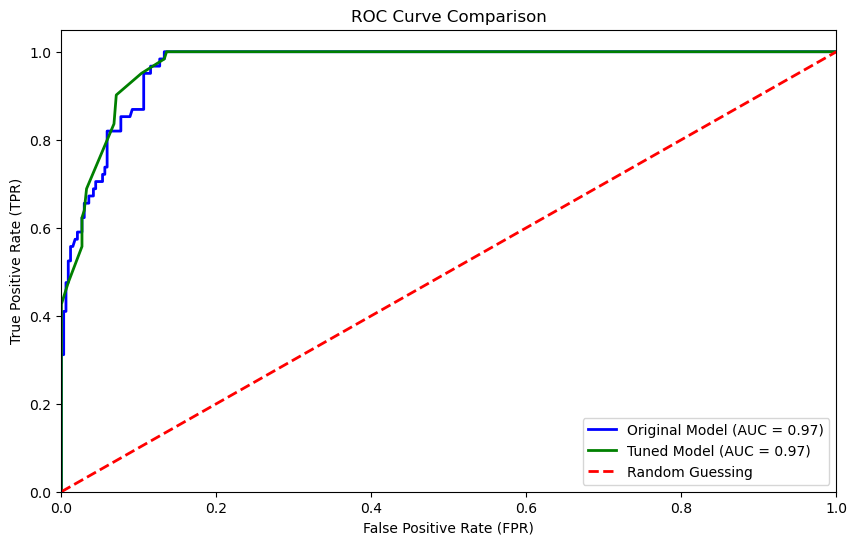

In [50]:
# Predict probabilities
y_proba = gb_clf.predict_proba(X_test)[:, 1]
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_proba)
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
roc_auc = roc_auc_score(y_test, y_proba)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model (AUC = {roc_auc:.2f})')
plt.plot(fpr_best, tpr_best, color='green', lw=2, label=f'Tuned Model (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()